# Gaussian process
This code is for my own learning purpose, but shared here if anybody else wants to use it. It mainly comes from the lecture fo Dr. De freitas https://www.youtube.com/watch?v=4vGiHC35j9s&list=PLE6Wd9FR--EdyJ5lbFl8UuGjecvVw66F6&index=8

#####  The algorithm is as follows:
##### 1) create n xs => create X1:n 
##### 2) then create normal distribution with Mu_n and K_n*n => create Mu_n (usually it's zero), K_n*n
##### 3) K = L*(transpose(L)) => use cholesky to calculate inverse of covariance matrix
##### 4) Then I draw bunch of samples from the distribution of N(Mu_n,K) ~ N(Mu_n,I)*L => f_i ~ N(Mu_n,K)

In [36]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

## Sampling from p(f)

In [37]:
""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()

In [38]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [39]:
N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1)) # Training points
y = f(X) + s*np.random.randn(N)          # Training points target values

K = kernel(X, X)                        # Kernel at training points
L = np.linalg.cholesky(K + s*np.eye(N)) # Calculating the inverse of the covariance using the cholesky

In [40]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1) # Test points

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))  # Using linear matrix solver to find the roots of L*X = kernel
mu = np.dot(Lk.T, np.linalg.solve(L, y))   # Find the mean by matching the covariance matrices

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # Kernel at test points
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   # Compute the standard deviation of the test data
s = np.sqrt(s2)                            # Copute the variance of the test data

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

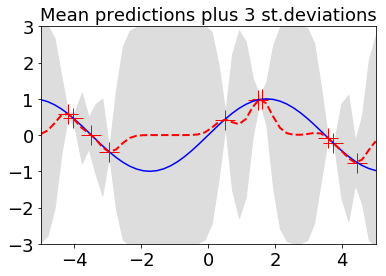

In [41]:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)                                          # Training data
pl.plot(Xtest, f(Xtest), 'b-')                                      # Actual mean of the test set (in blue)
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")  # Mu +/- 3 standard deviation
pl.plot(Xtest, mu, 'r--', lw=2)                                     # Predicted mean of the test set (in red --)
#pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations',fontsize = 18)
pl.axis([-5, 5, -3, 3])
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text yticklabel objects>)

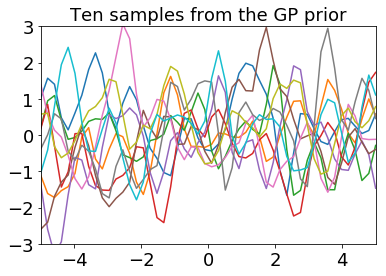

In [42]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))            # Calculating the inverse of the covariance using the cholesky
f_prior = np.dot(L, np.random.normal(size=(n,10)))     # Sampling from the distribution

pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior', fontsize = 18)
pl.axis([-5, 5, -3, 3])
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#pl.savefig('prior.png', bbox_inches='tight')

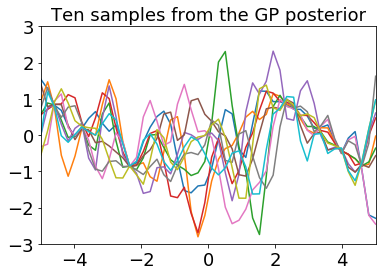

In [48]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))         # Calculating the inverse of the covariance using the cholesky     
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))   # calculating the poterior
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior',fontsize = 18)
pl.axis([-5, 5, -3, 3])
#pl.savefig('post.png', bbox_inches='tight')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
pl.show()